## Random Forests


Random Forest is the choice of algorithm when one can’t think of any algorithm irrespective of situation, to apply on a dataset or if one wants to learn about the data before applying any more apt complex algorithms. It is considered to be a solution of all data science problems. 

Random Forests are capable of performing both regression and classification tasks. It helps in dimensional reduction, treats missing values, outlier values and other essential steps of data exploration, and does a fairly good job. Before trying to get into the details of random forest understanbd how decision trees work.

**Decision trees** are a type of supervised learning algorithm mostly used in classification problems. It works for both categorical and continuous input and output variables. The main idea behind algorithm is to split the population or sample into two or more sub-populations based on a most significant differentiator in input variables.

<img src="../images/decision_tree.png">


image source: [AnalyticsVidhya](https://www.analyticsvidhya.com/blog/2016/04/complete-tutorial-tree-based-modeling-scratch-in-python/)

**Example:** Consider a problem of predicting whether a customer will pay his loan debt amount either yes or no. The income of the customer is the deciding variable in this case. But the company doesn't income details of all customers. Based on the insight that incomes drives this decision a decision tree can be built to predict customer's income based on occupation, education level and sex and various other variables. Here continuous variable is being predicted. 

Decision tree builds a single tree whether if its classification or regression using CART model() but Random forest algorithm builds multiple trees. A random forest to classify an object based on attributes, each tree that is built gives a classification and votes for a class. The forest chooses the classification having the most votes (over all the trees in the forest) and in case of regression, it takes the average of outputs by different trees.

Illustrate this idea on iris dataset and compare the results. Load the default iris dataset.

In [1]:
iris_data=(data=iris)
head(iris_data)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


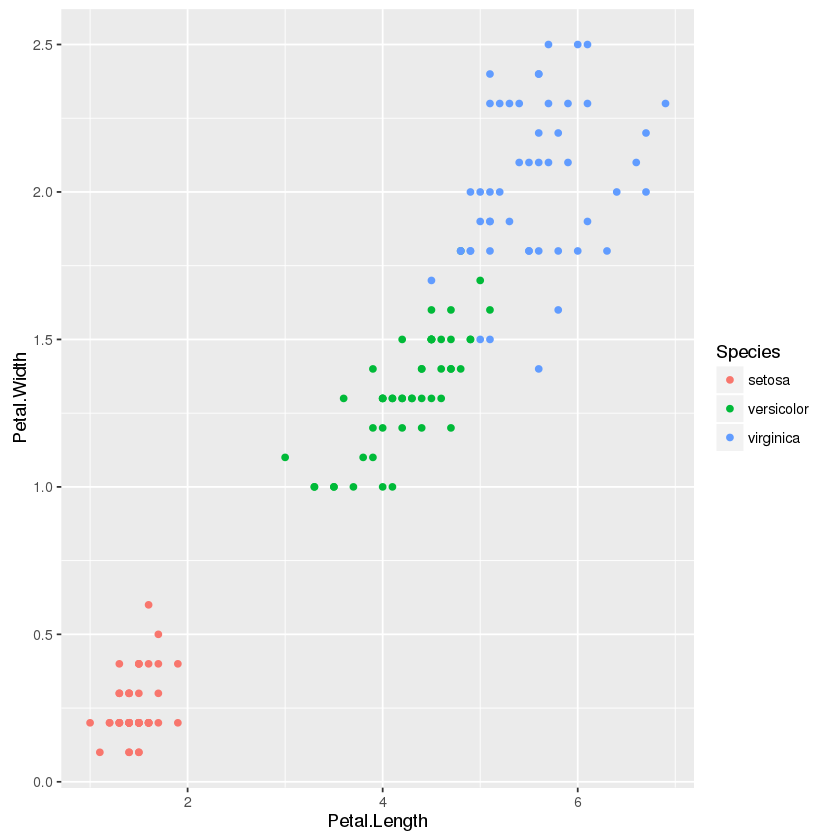

In [2]:
# Visually inspect the data on a graph

library(ggplot2)
qplot(Petal.Length,Petal.Width,colour=Species,data=iris_data)

In [3]:
# Install below packages for building a CART model.
library(rpart)
library(caret)

Loading required package: lattice


**Reference: ** 

- [rpart](https://cran.r-project.org/web/packages/rpart/vignettes/longintro.pdf)
- [caret](https://cran.r-project.org/web/packages/caret/vignettes/caret.pdf)
- [Tree based models](http://www.statmethods.net/advstats/cart.html)

Divide the population in to training and testing sets. Compare the predictive power of decision tree and random forest on testing set of data.

In [4]:
# Create a vector called flag such that 70% of the data is put into training set and rest in to testing set. 
# flag will have row numbers corresponding to observations that will be put into training set and the rows remaining in iris_data
# will be put into testing set.
flag <- createDataPartition(y=iris_data$Species,p=0.7,list=FALSE)

# training will have rows from iris_data for the row numbers present in flag vector.
training <- iris_data[flag,]
nrow(training)

# testing will have rows from iris_data which are not present in flag vector.
testing <- iris_data[-flag,]
nrow(testing)

[1] 105

[1] 45

So we have 105 observations in training set and 45 in testing set.

Build a CART model. "caret" and "rpart" packages will be used to build the model. To create a more graphically appealing graph in R, a package called “rattle” is used to make the decision tree. "Rattle" builds more fancy and clean trees which are easy to interpret.

In [5]:
# install.packages("rpart.plot",repo="http://cran.mtu.edu/")

fit <- train(Species~.,method="rpart",data=training)

# Code for generating decision tree plot
# rpart_fit <- rpart(Species~.,method="class",data=training) 
# library(rpart.plot)
# rpart.plot(rpart_fit)

Now check the predictive power of the CART model that is just built. Check for the number of misclassifications in the tree as the decision criteria.

In [6]:
train.pred<-predict(fit,newdata=training)
table(train.pred,training$Species)

            
train.pred   setosa versicolor virginica
  setosa         35          0         0
  versicolor      0         33         1
  virginica       0          2        34

In [7]:
# Misclassification rate = 4/105
4/105

[1] 0.03809524

There are 4 misclassifications out of 105 observations. The misclassification rate signifies its predictive power. Once the model is built, it should be validated on a test set to see how well it performs on unknown data. This will help in determining the model is not over fitted. In case the model is over fitted, validation will show a sharp decline in the predictive power.

In [8]:
test.pred<-predict(fit,newdata=testing)
table(test.pred,testing$Species)

            
test.pred    setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         15         3
  virginica       0          0        12

In [9]:
# Misclassification rate = 3/45
3/45

[1] 0.06666667

The predictive power decreased in testing set as compared to training. This is generally true in most cases. The reason being, the model is trained on the training data set, and just overlaid on validation training set.

### Random Forest

Run random forest algorithm on iris_data to compare the results with CART model.

In [10]:
library(randomForest)
# library(randomForestSRC)

randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘randomForest’

The following object is masked from ‘package:ggplot2’:

    margin



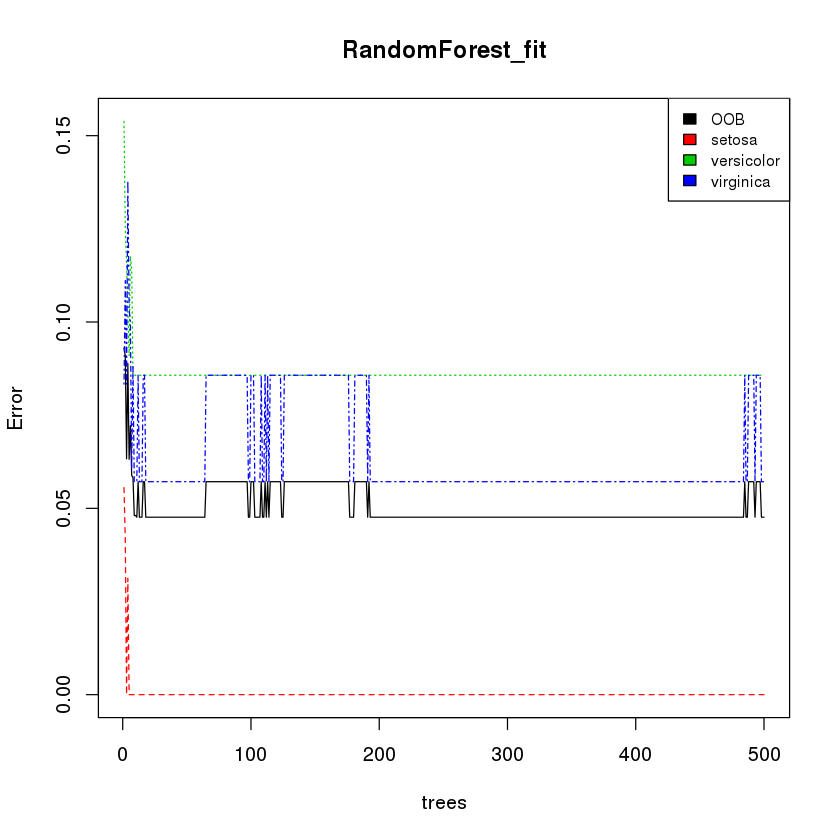

In [11]:
RandomForest_fit <- randomForest(Species~.,method="class",data=training,importance=TRUE) 


plot(RandomForest_fit)
legend("topright", colnames(RandomForest_fit$err.rate),col=1:4,cex=0.8,fill=1:4)

The plot shows the amount of error with the variation in the number of trees constructed. Play with number of trees to generate. 

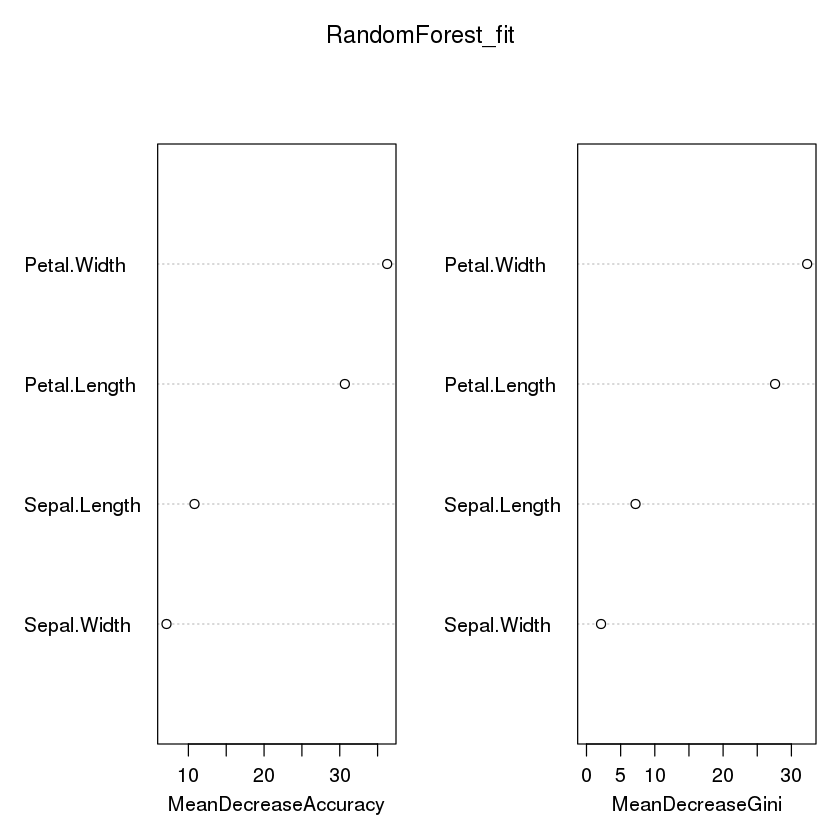

In [12]:
varImpPlot(RandomForest_fit)

#### Gini importance: 

Every time a split of a node is made on variable m the gini impurity criterion for the two descendent nodes is less than the parent node. Adding up the gini decreases for each individual variable over all trees in the forest gives a fast variable importance that is often very consistent with the permutation importance measure.

**Reference: **[Variable importance](https://en.wikipedia.org/wiki/Random_forest#Variable_importance)

In [13]:
importance(RandomForest_fit)

,setosa,versicolor,virginica,MeanDecreaseAccuracy,MeanDecreaseGini
Sepal.Length,7.755774,5.150598,7.467874,10.806998,7.181181
Sepal.Width,4.715161,3.171594,6.033877,7.107046,2.129513
Petal.Length,22.942394,25.644507,25.478723,30.673532,27.611822
Petal.Width,21.049809,33.762717,32.200945,36.266855,32.309427


In [14]:
# install.packages("party",repo="http://cran.mtu.edu/")

# library(party)
 
# ct = ctree(Species~., data = training)
# plot(ct, main="Tree")
 
# #Table of prediction errors
# table(predict(ct), training$Species)
 
# # Estimated class probabilities
# train.pred = predict(ct, newdata=training, type="prob")

In [15]:
RF_fit <- train(Species~ .,method="rf",data=training)

In [16]:
train_RF_pred <- predict(RF_fit,training)

In [17]:
table(train_RF_pred,training$Species)

             
train_RF_pred setosa versicolor virginica
   setosa         35          0         0
   versicolor      0         35         0
   virginica       0          0        35

Misclassification rate in training data is 0/105. Validate to make sure that the model is not over fitted on the training data by testing on tets data.

In [18]:
test_RF_pred<-predict(RF_fit,newdata=testing)

In [19]:
table(test_RF_pred,testing$Species)

            
test_RF_pred setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         15         2
  virginica       0          0        13

There are 3 misclassified observations out of 45, which is similar to CART model prediction power. There is a significant drop in predictive power of the model when compared to training misclassification rate.

**Feature Reduction using ANOVA, MANOVA and Random Forests.**

Apply Random Forests and the techniques we have seen in other lab notebooks on bikeshare dataset.

In [20]:
bikeshare_data = read.csv("../../../datasets/bikeshare/hour.csv")
head(bikeshare_data)

instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1


In [21]:
str(bikeshare_data)

'data.frame':	17379 obs. of  17 variables:
 $ instant   : int  1 2 3 4 5 6 7 8 9 10 ...
 $ dteday    : Factor w/ 731 levels "2011-01-01","2011-01-02",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ season    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ yr        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ mnth      : int  1 1 1 1 1 1 1 1 1 1 ...
 $ hr        : int  0 1 2 3 4 5 6 7 8 9 ...
 $ holiday   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ weekday   : int  6 6 6 6 6 6 6 6 6 6 ...
 $ workingday: int  0 0 0 0 0 0 0 0 0 0 ...
 $ weathersit: int  1 1 1 1 1 2 1 1 1 1 ...
 $ temp      : num  0.24 0.22 0.22 0.24 0.24 0.24 0.22 0.2 0.24 0.32 ...
 $ atemp     : num  0.288 0.273 0.273 0.288 0.288 ...
 $ hum       : num  0.81 0.8 0.8 0.75 0.75 0.75 0.8 0.86 0.75 0.76 ...
 $ windspeed : num  0 0 0 0 0 0.0896 0 0 0 0 ...
 $ casual    : int  3 8 5 3 0 0 2 1 1 8 ...
 $ registered: int  13 32 27 10 1 1 0 2 7 6 ...
 $ cnt       : int  16 40 32 13 1 1 2 3 8 14 ...


In [22]:
bikeshare_data$hr = factor(bikeshare_data$hr)
bikeshare_data$weekday = factor(bikeshare_data$weekday)

In [23]:
fit <- aov(mnth ~ hr, data=bikeshare_data)
summary(fit)

               Df Sum Sq Mean Sq F value Pr(>F)
hr             23     25   1.078   0.091      1
Residuals   17355 205473  11.839               

The p-value suggests there is no variation in the means of data by hour for all the months.

In [24]:
fit <- aov(mnth ~ weekday, data=bikeshare_data)
summary(fit)

               Df Sum Sq Mean Sq F value Pr(>F)
weekday         6     31   5.207    0.44  0.852
Residuals   17372 205467  11.827               

In [27]:
fit <- aov(temp ~ hr, data=bikeshare_data)
summary(fit)

               Df Sum Sq Mean Sq F value Pr(>F)    
hr             23   35.5  1.5420   43.95 <2e-16 ***
Residuals   17355  608.9  0.0351                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [28]:
# Do pairwise comparison between group means for each hour
pairwise.t.test(bikeshare_data$temp, bikeshare_data$hr,p.adjust="bonferroni")


	Pairwise comparisons using t tests with pooled SD 

data:  bikeshare_data$temp and bikeshare_data$hr 

   0       1       2       3       4       5       6       7       8      
1  1.00000 -       -       -       -       -       -       -       -      
2  1.00000 1.00000 -       -       -       -       -       -       -      
3  1.00000 1.00000 1.00000 -       -       -       -       -       -      
4  1.00000 1.00000 1.00000 1.00000 -       -       -       -       -      
5  0.41768 1.00000 1.00000 1.00000 1.00000 -       -       -       -      
6  0.10540 1.00000 1.00000 1.00000 1.00000 1.00000 -       -       -      
7  1.00000 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000 -       -      
8  1.00000 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000 -      
9  1.00000 1.00000 1.00000 1.00000 0.67330 0.01057 0.00187 0.03538 1.00000
10 0.20425 0.00771 0.00087 0.00049 1.5e-05 1.8e-08 1.2e-09 1.1e-07 0.00097
11 5.4e-06 3.6e-08 1.5e-09 7.4e-10 5.7e-12 5.2e-16 < 2e-16 5.6e-15 1.7

Although there is not much variation in the temparature for some of the hours there is a lot of variation in the temparature of the day based on hour for some of the hours. Lets find the mean temparature of each hour using tapply().

In [29]:
t(tapply(bikeshare_data$temp,bikeshare_data$hr,mean))

0,1,2,3,4,5,6,7,8,9,⋯,14,15,16,17,18,19,20,21,22,23
0.4674105,0.4593646,0.4545734,0.4531133,0.4466284,0.4361227,0.432469,0.4390922,0.4549931,0.4767263,⋯,0.5650754,0.5686145,0.5649589,0.5545753,0.5411813,0.5241758,0.5085989,0.4953022,0.4845055,0.4750275


In [30]:
# Do a MANOVA on variables temp,hum,windspeed,holiday and weathersit using hr and weekday variables
summary(manova(cbind(temp,hum,windspeed,holiday,weathersit) ~ hr * weekday,
               data = bikeshare_data), test = "Hotelling-Lawley")

              Df Hotelling-Lawley approx F num Df den Df Pr(>F)    
hr            23          0.46393   69.410    115  86027 <2e-16 ***
weekday        6          0.10114   58.005     30  86027 <2e-16 ***
hr:weekday   138          0.01853    0.462    690  86027      1    
Residuals  17211                                                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

According to manova, these variables temp,hum,windspeed,holiday and weathersit vary by hr and weekday. Lets analyze the same for rest of the variables.

In [31]:
names(bikeshare_data)

[1] "instant"    "dteday"     "season"     "yr"         "mnth"      
 [6] "hr"         "holiday"    "weekday"    "workingday" "weathersit"
[11] "temp"       "atemp"      "hum"        "windspeed"  "casual"    
[16] "registered" "cnt"

In [32]:
summary(manova(cbind(season,mnth) ~ hr * weekday,
               data = bikeshare_data), test = "Hotelling-Lawley")

              Df Hotelling-Lawley approx F num Df den Df  Pr(>F)  
hr            23       0.00016426  0.06145     46  34418 1.00000  
weekday        6       0.00109778  1.57431     12  34418 0.09124 .
hr:weekday   138       0.00020925  0.01305    276  34418 1.00000  
Residuals  17211                                                  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

month and season are not contributing anything as they have little variation in their data. 

### Measuring variable importance using Random Forests

#### Gini importance

The mean Gini gain that is produced by a feature over all trees. Consider `RF` is the Random Forest model fitted on the data. 

$RF <- randomForest(..., importance=TRUE)$

There are 2 ways of checking the impoortance

* RF$importance       **column**: MeanDecreaseGini

* importance(RF, type=2)

Note: For variables of different types: there will be a bias in favor of continuous variables and variables with many categories.

#### Permutation importance
 
The mean decrease in classification accuracy after permuting the feature over all trees 

$RF <- randomForest(..., importance=TRUE)$

- RF$importance **column**: MeanDecreaseAccuracy
- importance(RF, type=1)

obj <- cforest(...)
varimp(obj)

Note: For variables of different types: unbiased only when subsampling is used as in cforest(..., controls = cforest unbiased())

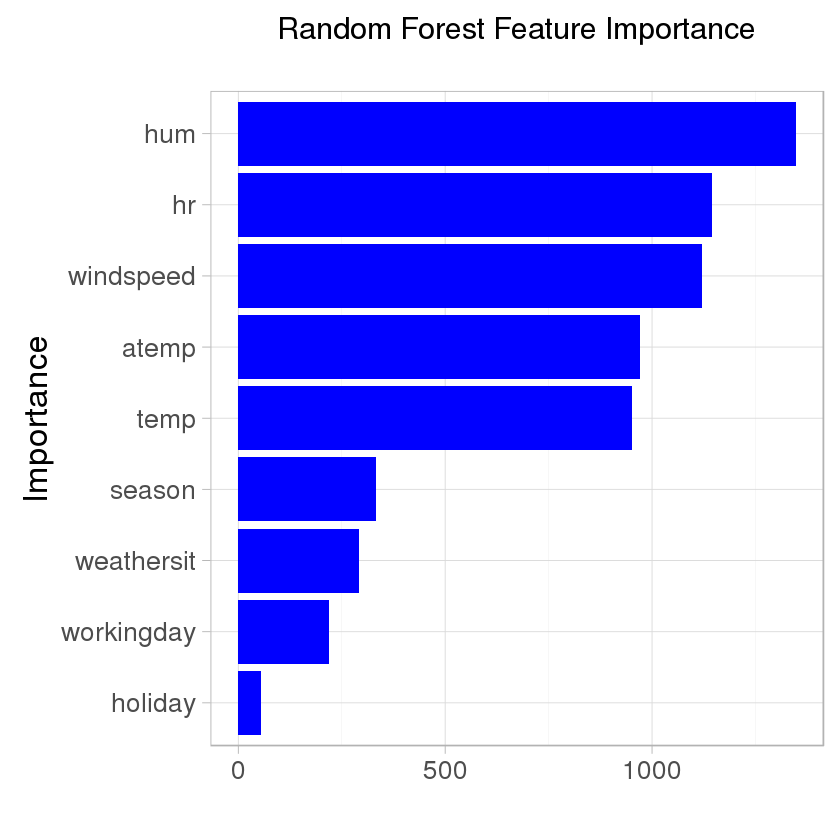

In [33]:
# Train a model across all the training data and plot the variable importance
rf <- randomForest(bikeshare_data[,c("season","holiday","workingday","weathersit","temp","atemp","hum","windspeed","hr")], 
                                  bikeshare_data$count, ntree=50, importance=TRUE)
imp <- importance(rf, type=2)
Imp_features <- data.frame(Feature=row.names(imp), Importance=imp[,1])

p <- ggplot(Imp_features, aes(x=reorder(Feature, Importance), y=Importance)) +
     geom_bar(stat="identity", fill="blue") +
     coord_flip() + 
     theme_light(base_size=20) +
     xlab("Importance") +
     ylab("") + 
     ggtitle("Random Forest Feature Importance\n") +
     theme(plot.title=element_text(size=18))
p

In [1]:
cbind(importance(rf, type=1),importance(rf, type=2))

ERROR: Error in cbind(importance(rf, type = 1), importance(rf, type = 2)): could not find function "importance"


In [ ]:
varImpPlot(rf)

From the plots hr is the most important variable followed by holiday, atemp and so on for MeanDEcreaseAccuracy measure of importance. hum is the most important variable according to MeanDecreaseGini measure. 